In [2]:
def read_input_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        
        # Read grid dimensions
        m, n = map(int, lines[0].split())
        
        # Read number of obstacles
        k = int(lines[1])
        
        # Read obstacle coordinates
        obstacles = []
        for i in range(2, 2 + k):
            x, y = map(int, lines[i].split())
            obstacles.append((x, y))
        
        # Read starting and destination cell coordinates
        start = tuple(map(int, lines[2 + k].split()))
        destination = tuple(map(int, lines[3 + k].split()))
        
        return m, n, k, obstacles, start, destination

# Specify the input file name
filename = "../../test cases/input.txt"

# Read input from the file
m, n, k, obstacles, start, destination = read_input_file(filename)

# Print the extracted input values
print("Grid dimensions:", m, n)
print("Number of obstacles:", k)
print("Obstacle coordinates:", obstacles)
print("Starting cell coordinates:", start)
print("Destination cell coordinates:", destination)

Grid dimensions: 14 9
Number of obstacles: 25
Obstacle coordinates: [(4, 0), (3, 4), (11, 2), (8, 6), (2, 2), (11, 5), (2, 5), (1, 3), (6, 2), (6, 5), (3, 0), (3, 3), (10, 2), (2, 4), (1, 2), (12, 2), (12, 5), (4, 4), (8, 4), (8, 1), (0, 0), (11, 3), (1, 4), (2, 6), (7, 5)]
Starting cell coordinates: (9, 1)
Destination cell coordinates: (2, 1)


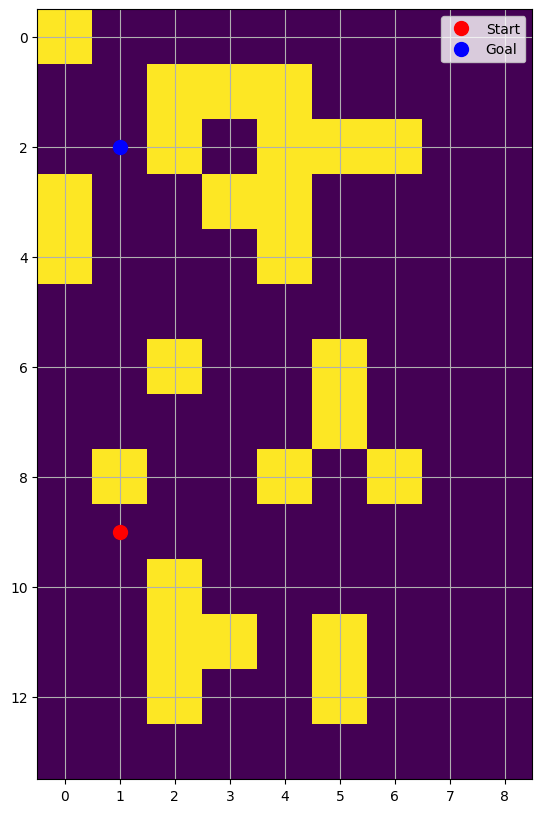

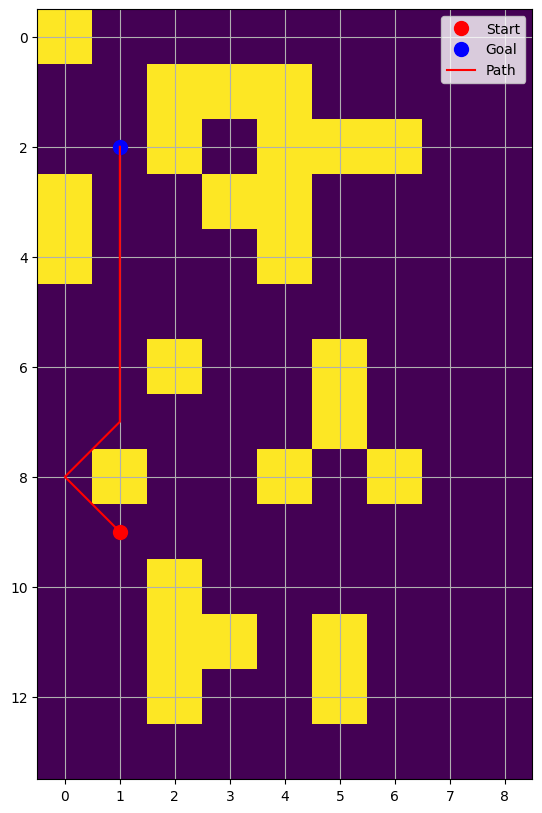

Path: [(9, 1), (8, 0), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1)]
Path cost: 7


In [3]:
# A* search algorithm for shortest path using the g(n) and h(n) values from graph

import numpy as np
import matplotlib.pyplot as plt

# Grid class
class Grid:
    # Constructor
    def __init__(self, graph, start, goal):
        self.graph = graph
        self.start = start
        self.goal = goal
        self.path = []
        self.visited = []
        self.unvisited = []
        self.g = {}
        self.h = {}
        self.f = {}
        self.parent = {}
        self.cost = 0
        self.path_cost = 0
        self.visited.append(self.start)
        self.unvisited.append(self.start)
        self.g[self.start] = 0
        self.h[self.start] = self.heuristic(self.start)
        self.f[self.start] = self.g[self.start] + self.h[self.start]
        self.parent[self.start] = self.start

    # Heuristic function
    def heuristic(self, node):
        # return np.sqrt((self.goal[0] - node[0])**2 + (self.goal[1] - node[1])**2)
        return np.abs(self.goal[0] - node[0]) + np.abs(self.goal[1] - node[1])

    # A* search algorithm
    def a_star(self):
        while self.unvisited:
            # Find the node with the minimum f value
            min_f = self.f[self.unvisited[0]]
            min_node = self.unvisited[0]
            for node in self.unvisited:
                if self.f[node] < min_f:
                    min_f = self.f[node]
                    min_node = node
            # Remove the node from the unvisited list
            self.unvisited.remove(min_node)
            # Add the node to the visited list
            self.visited.append(min_node)
            # Check if the goal is reached
            if min_node == self.goal:
                # Calculate the path
                self.path.append(self.goal)
                self.path_cost = self.g[self.goal]
                while self.parent[self.path[-1]] != self.start:
                    self.path.append(self.parent[self.path[-1]])
                self.path.append(self.start)
                self.path.reverse()
                break
            # Find the neighbors of the current node
            neighbors = []
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if i == 0 and j == 0:
                        continue
                    neighbor = (min_node[0] + i, min_node[1] + j)
                    if neighbor[0] < 0 or neighbor[0] >= self.graph.shape[0] or neighbor[1] < 0 or neighbor[1] >= self.graph.shape[1]:
                        continue
                    if self.graph[neighbor[0], neighbor[1]] == 1:       # Obstacle
                        continue
                    neighbors.append(neighbor)
            # Update the g, h, f, and parent values of the neighbors
            for neighbor in neighbors:
                if neighbor in self.visited:
                    continue
                if neighbor not in self.unvisited:
                    self.unvisited.append(neighbor)
                self.g[neighbor] = self.g[min_node] + 1
                self.h[neighbor] = self.heuristic(neighbor)
                self.f[neighbor] = self.g[neighbor] + self.h[neighbor]
                self.parent[neighbor] = min_node

    # Plot the graph
    def plot_graph(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.graph)
        plt.plot(self.start[1], self.start[0], 'ro', label='Start', markersize=10)
        plt.plot(self.goal[1], self.goal[0], 'bo', label='Goal', markersize=10)
        plt.grid()
        plt.legend()
        plt.show()

    # Plot the path
    def plot_path(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.graph)
        plt.plot(self.start[1], self.start[0], 'ro', label='Start', markersize=10)
        plt.plot(self.goal[1], self.goal[0], 'bo', label='Goal', markersize=10)
        plt.plot([node[1] for node in self.path], [node[0] for node in self.path], 'r', label='Path')
        plt.grid()
        plt.legend()
        plt.show()

# Main function
def main():
    m, n, k, obstacles, start, destination = read_input_file(filename)

    graph = np.zeros((m, n))
    for obstacle in obstacles:
        graph[obstacle[0], obstacle[1]] = 1

    # Create the graph object
    graph_obj = Grid(graph, start, destination)

    # Plot the graph
    graph_obj.plot_graph()
    # Find the shortest path
    graph_obj.a_star()
    # Plot the path
    graph_obj.plot_path()
    # Print the path
    print('Path:', graph_obj.path)
    print('Path cost:', graph_obj.path_cost)

main()